<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# using the previously cleaned up data file
file_url = "df_str_replaced.csv"

#Create the dataframe
df = pd.read_csv(file_url, index_col=0)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
# summarize
summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
summary['Non-Null Count'] = df.count()
summary['Missing Values'] = df.isnull().sum()
with pd.option_context('display.max_rows', 200):
    print(summary.sort_values(by='Missing Values', ascending=False))

                               Data Type  Non-Null Count  Missing Values
AINextMuch less integrated        object            1148           64289
AINextLess integrated             object            2355           63082
AINextNo change                   object           12498           52939
AINextMuch more integrated        object           13438           51999
EmbeddedAdmired                   object           16733           48704
EmbeddedWantToWorkWith            object           17600           47837
EmbeddedHaveWorkedWith            object           22214           43223
ConvertedCompYearly              float64           23435           42002
AIToolNot interested in Using     object           24414           41023
AINextMore integrated             object           24428           41009
Knowledge_9                       object           27635           37802
Frequency_3                       object           27710           37727
Knowledge_8                       object           

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [7]:
##Write your code here
for col in ['DevType', 'Industry']:
    print(df[col].value_counts())

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Software Development'),
  Text(1, 0, 'Other:'),
  Text(2, 0, 'Fintech'),
  Text(3, 0, 'Internet, Telecomm or Information Services'),
  Text(4, 0, 'Banking/Financial Services'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Manufacturing'),
  Text(7, 0, 'Retail and Consumer Services'),
  Text(8, 0, 'Government'),
  Text(9, 0, 'Media & Advertising Services'),
  Text(10, 0, 'Higher Education'),
  Text(11, 0, 'Transportation, or Supply Chain'),
  Text(12, 0, 'Computer Systems Design and Services'),
  Text(13, 0, 'Energy'),
  Text(14, 0, 'Insurance')])

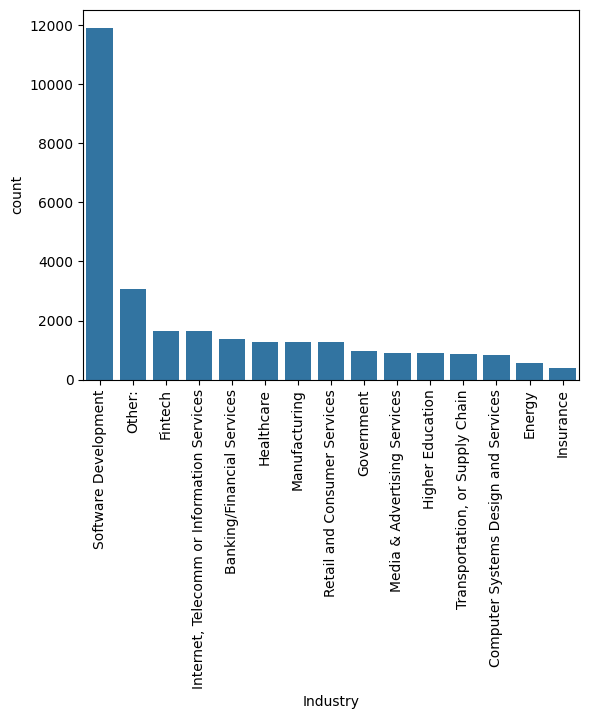

In [9]:
sns.barplot(df['Industry'].value_counts())
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Developer, full-stack'),
  Text(1, 0, 'Developer, back-end'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Developer, front-end'),
  Text(4, 0, 'Developer, desktop or enterprise applications'),
  Text(5, 0, 'Other (please specify):'),
  Text(6, 0, 'Developer, mobile'),
  Text(7, 0, 'Developer, embedded applications or devices'),
  Text(8, 0, 'Engineering manager'),
  Text(9, 0, 'Academic researcher'),
  Text(10, 0, 'Data engineer'),
  Text(11, 0, 'Data scientist or machine learning specialist'),
  Text(12, 0, 'DevOps specialist'),
  Text(13, 0, 'Research & Development role'),
  Text(14, 0, 'Senior Executive (C-Suite, VP, etc.)'),
  Text(15, 0, 'Developer, game or graphics'),
  Text(16, 0, 'Cloud infrastructure engineer'),
  Text(17, 0, 'System administrator'),
  Text(18, 0, 'Developer, 

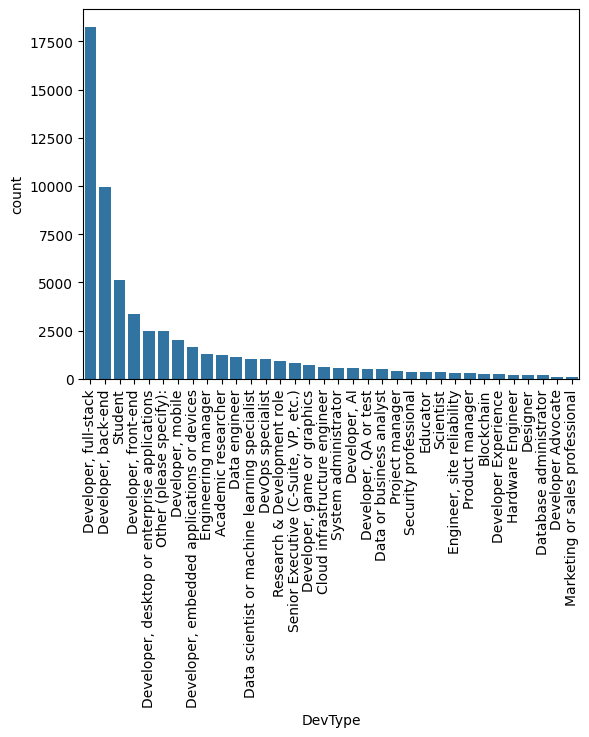

In [4]:
sns.barplot(df['DevType'].value_counts())
plt.xticks(rotation=90)

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

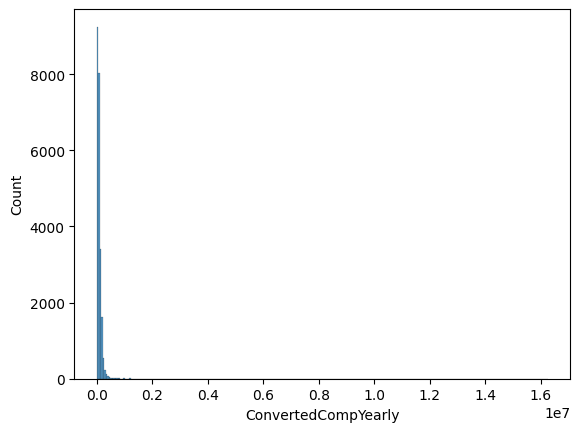

In [15]:
##Write your code here
sns.histplot(df['ConvertedCompYearly'])

In [30]:
stats = df['ConvertedCompYearly'].describe()
print('Stats of ConvertedCompYearly:', stats)
threshold = stats['mean']+stats['std']*3
print('Outlier threshold: ', threshold)
df[df['ConvertedCompYearly'] > threshold]

Stats of ConvertedCompYearly: count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
Outlier threshold:  646426.2065215341


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CatCompYearly
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0,500000-1000000
828,829,I am a developer by profession,35-44 years old,"Employed, full-time",Hybrid,Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0,500000-1000000
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0,500000-1000000
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time",Hybrid,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0,500000-1000000
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN,1000000-10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,On the job training;Other online resources (e....,Books;Written Tutorials;Interactive tutorial;V...,...,0.0,0.0,0.0,0.0,0.0,Too long,NaN,1000000.0,10.0,500000-1000000
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,1300000.0,NaN,1000000-10000000
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,...,0.0,20.0,0.0,0.0,10.0,Appropriate in length,Easy,800000.0,10.0,500000-1000000
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN,500000-1000000


In [16]:
# Define custom bin edges and labels
bins = [0, 10000, 50000, 100000, 200000, 500000, 1000000, 10000000, 20000000]
ranges = ['0-10000', '10000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000-10000000', '>10000000']

# Apply binning and add the results to a new column
df['CatCompYearly'] = pd.cut(df['ConvertedCompYearly'], bins, labels=ranges)

In [17]:
df['CatCompYearly'].value_counts()

CatCompYearly
50000-100000        7985
10000-50000         6381
100000-200000       5365
0-10000             2417
200000-500000       1162
500000-1000000        84
1000000-10000000      39
>10000000              2
Name: count, dtype: int64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [31]:
##Write your code here
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(f'IQR = Q3 - Q1 = {Q3} - {Q1} = {IQR}')
print('Q1 - 1.5 IQR =', lower_bound)
print('Q3 + 1.5 IQR =', upper_bound)

IQR = Q3 - Q1 = 107971.5 - 32712.0 = 75259.5
Q1 - 1.5 IQR = -80177.25
Q3 + 1.5 IQR = 220860.75


In [33]:
df[df['ConvertedCompYearly'] > upper_bound]

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CatCompYearly
428,429,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,25.0,25.0,25.0,Appropriate in length,Neither easy nor difficult,230000.0,8.0,200000-500000
456,457,I am a developer by profession,45-54 years old,"Employed, full-time",Hybrid,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","School (i.e., University, College, etc)",NaN,...,10.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,300000.0,1.0,200000-500000
461,462,I am a developer by profession,45-54 years old,"Employed, full-time",Hybrid,Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,50.0,0.0,10.0,10.0,0.0,Appropriate in length,Neither easy nor difficult,254425.0,7.0,200000-500000
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0,500000-1000000
545,546,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,5.0,5.0,10.0,0.0,0.0,Appropriate in length,Easy,400000.0,8.0,200000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN,500000-1000000
41000,41001,I am a developer by profession,35-44 years old,"Employed, full-time",Hybrid,Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;On the job training;Other online res...,Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,80.0,50.0,0.0,Too long,Neither easy nor difficult,235000.0,6.0,200000-500000
41001,41002,I am a developer by profession,45-54 years old,"Employed, full-time;Student, part-time",Hybrid,Apples,School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,260000.0,NaN,200000-500000
41027,41028,I am a developer by profession,55-64 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,I don’t code outside of work,Some college/university study without earning ...,Other (please specify):,NaN,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,700000.0,10.0,500000-1000000


Text(0.5, 1.0, 'Box Plot showing many outliers (978)')

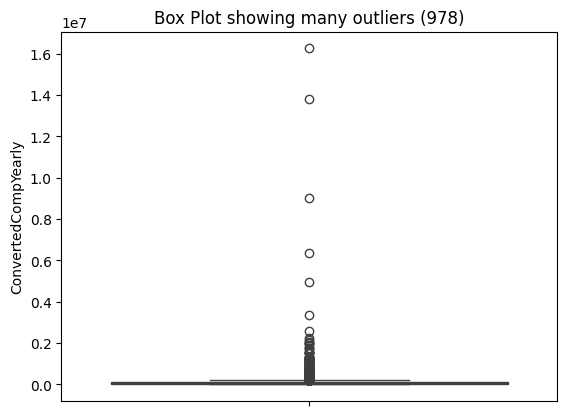

In [35]:
sns.boxplot(df['ConvertedCompYearly'])
plt.title('Box Plot showing many outliers (978)')

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Text(0.5, 1.0, 'Excluding outliers over 3 sigmas above mean')

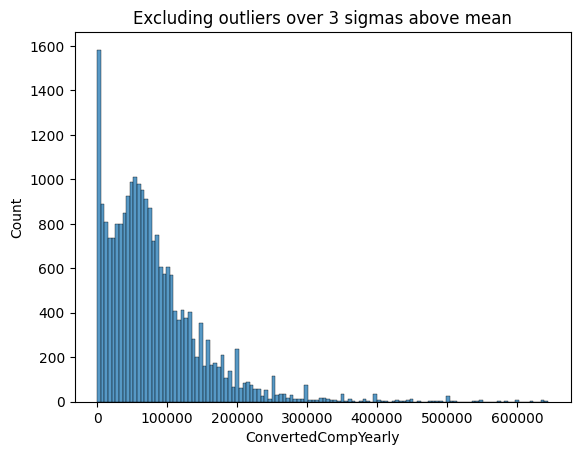

In [39]:
##Write your code here
# exclude outliers over 3 sigmas above mean
df2 = df[df['ConvertedCompYearly'] <= threshold]
sns.histplot(df2['ConvertedCompYearly'])
plt.title('Excluding outliers over 3 sigmas above mean')

Text(0.5, 1.0, 'Excluding outliers over Q3+1.5IQR')

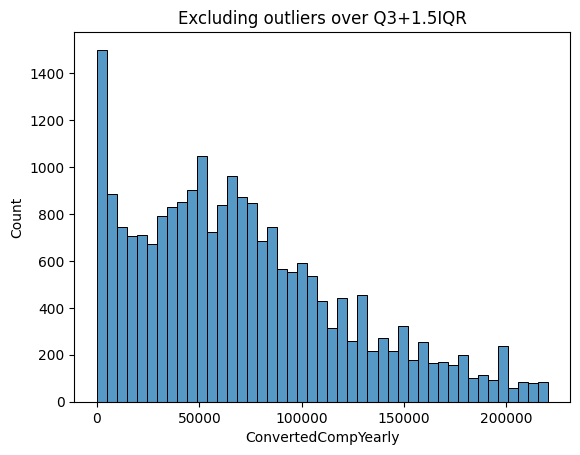

In [40]:
# exclude outliers over Q3+1.5IQR (more stringent, discarding more)
df3 = df[df['ConvertedCompYearly'] <= upper_bound]
sns.histplot(df3['ConvertedCompYearly'])
plt.title('Excluding outliers over Q3+1.5IQR')

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [47]:
# inspect Age
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [68]:
# discard unknown age
df4 = df[df['Age'] != 'Prefer not to say']
# replace range with approximate age
df4['Age_num'] = df4['Age'].replace({
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '18-24 years old': 21,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    'Under 18 years old': 14,
    '65 years or older': 70}).astype(float)
df4.describe()

C:\Users\clifford\AppData\Local\Temp\ipykernel_27700\1966367267.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['Age_num'] = df4['Age'].replace({
C:\Users\clifford\AppData\Local\Temp\ipykernel_27700\1966367267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Age_num'] = df4['Age'].replace({


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_num
count,65115.000000,3.372600e+04,29611.000000,29273.000000,29342.000000,29361.000000,29399.000000,29397.000000,29405.000000,29405.000000,29399.000000,29394.000000,2.342600e+04,29078.000000,65115.000000
mean,32706.369500,2.965071e+145,11.450204,18.588939,7.529488,10.069544,24.364134,22.981012,20.292081,16.178738,10.968698,9.962441,8.613250e+04,6.935209,32.928995
std,18882.746546,5.445247e+147,9.149328,25.974073,18.435003,21.846880,27.100750,27.027534,26.118117,24.853369,22.922295,21.788733,1.867864e+05,2.087668,11.390079
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,14.000000
25%,16359.500000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000,21.000000
50%,32697.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000,29.500000
75%,49046.500000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.079370e+05,8.000000,39.500000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000,70.000000


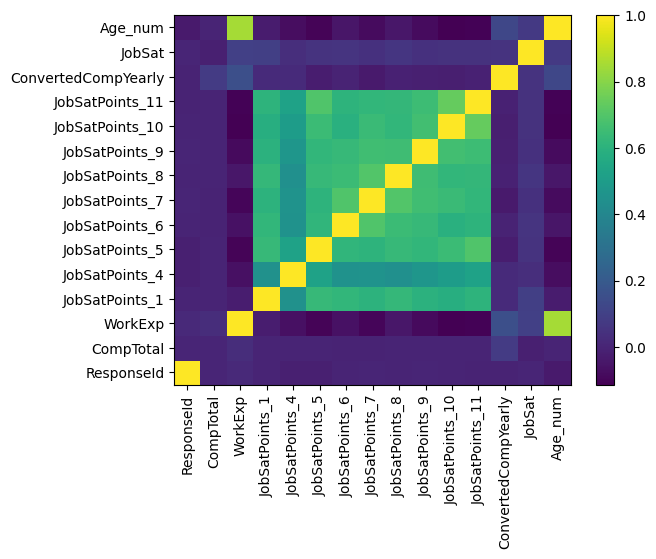

In [67]:
import numpy as np
fig, ax = plt.subplots()
num_corr = df4.select_dtypes(include=['float64', 'int64']).corr()
im = ax.pcolor(num_corr)

#label names
row_labels = num_corr.columns
col_labels = num_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(num_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(num_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
